In [2]:
import cv2
import glob
import os
import re
import sys
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
from xml.dom import minidom

In [3]:
!git clone https://github.com/thegrandpoobah/voronoi

Cloning into 'voronoi'...
remote: Enumerating objects: 537, done.
remote: Total 537 (delta 0), reused 0 (delta 0), pack-reused 537
Receiving objects: 100% (537/537), 4.36 MiB | 271.00 KiB/s, done.
Resolving deltas: 100% (327/327), done.


In [12]:
!make -C voronoi

Makefile    corpus      picopng     voronoi     voronoi.sln
README.md   license.txt stippler    voronoi.bat
c++ -Wall -fpermissive  -O2 -I./picopng -I./stippler -I./voronoi -c picopng/picopng.cpp -o picopng/picopng.o
c++ -Wall -fpermissive  -O2 -I./picopng -I./stippler -I./voronoi -c stippler/bitmap.cpp -o stippler/bitmap.o
c++ -Wall -fpermissive  -O2 -I./picopng -I./stippler -I./voronoi -c stippler/stippler_api.cpp -o stippler/stippler_api.o
c++ -Wall -fpermissive  -O2 -I./picopng -I./stippler -I./voronoi -c stippler/stippler.cpp -o stippler/stippler.o
c++ -Wall -fpermissive  -O2 -I./picopng -I./stippler -I./voronoi -c stippler/VoronoiDiagramGenerator.cpp -o stippler/VoronoiDiagramGenerator.o
c++ -Wall -fpermissive  -O2 -I./picopng -I./stippler -I./voronoi -c voronoi/parse_arguments.cpp -o voronoi/parse_arguments.o
c++ -Wall -fpermissive  -O2 -I./picopng -I./stippler -I./voronoi -c voronoi/voronoi.cpp -o voronoi/voronoi.o
In file included from voronoi/voronoi.cpp:42:
/usr/local/includ

In [16]:
!git clone https://github.com/PanyshevAlex/traveling-salesman

Cloning into 'traveling-salesman'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 56 (delta 0), reused 2 (delta 0), pack-reused 50
Receiving objects: 100% (56/56), 22.56 KiB | 563.00 KiB/s, done.
Resolving deltas: 100% (25/25), done.


In [17]:
!make -C traveling-salesman

g++ -O2 -DNDEBUG -ftree-vectorize -Wall -c main.cpp
g++ -O2 -DNDEBUG -ftree-vectorize -Wall -c city.cpp	
g++ -O2 -DNDEBUG -ftree-vectorize -Wall -c tree.cpp
g++ -O2 -DNDEBUG -ftree-vectorize -Wall -c algorithms.cpp
g++ -O2 -DNDEBUG -ftree-vectorize -Wall main.o city.o tree.o algorithms.o -o tsp


In [9]:
!git clone https://github.com/beckysag/traveling-salesman traveling_salesman_2

Cloning into 'traveling_salesman_2'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49
Receiving objects: 100% (49/49), 454.23 KiB | 597.00 KiB/s, done.
Resolving deltas: 100% (9/9), done.


In [12]:
!make -C traveling_salesman_2

g++ -g -Wall -c -MMD -MP -MF"MyThread.d" -MT"MyThread.d" -o "MyThread.o" "MyThread.cpp"
g++ -g -Wall -c -MMD -MP -MF"main.d" -MT"main.d" -o "main.o" "main.cpp"
g++ -g -Wall -c -MMD -MP -MF"threads.d" -MT"threads.d" -o "threads.o" "threads.cpp"
g++ -g -Wall -c -MMD -MP -MF"tsp.d" -MT"tsp.d" -o "tsp.o" "tsp.cpp"
g++ -g -Wall -c -MMD -MP -MF"twoOpt.d" -MT"twoOpt.d" -o "twoOpt.o" "twoOpt.cpp"
g++  -o "tsp" MyThread.o main.o threads.o tsp.o twoOpt.o -lm -L/usr/include -lpthread 


In [3]:
# Разбиваем видео на кадры
def video_to_frames(path):
    videoCapture = cv2.VideoCapture()
    videoCapture.open(path)
    fps = videoCapture.get(cv2.CAP_PROP_FPS) 
    frames = videoCapture.get(cv2.CAP_PROP_FRAME_COUNT)
    print("fps=", int(fps), "frames=", int(frames))
    count = 0
    for i in range(int(frames)-1):
        ret, frame = videoCapture.read()
        if type(frame) != type(None):
            cv2.imwrite("source/frames/%d.png"%(i), frame)
            count += 1
    return count

# создание файла для tsp solver формата: index x_coord y_coord 
def create_tsp(path, dest):
    doc = minidom.parse(path)
    circe_x = [path.getAttribute('cx') for path
                    in doc.getElementsByTagName('circle')]
    circe_y = [path.getAttribute('cy') for path
                    in doc.getElementsByTagName('circle')]
    f = open(dest, "w")
    for i in range(len(circe_x)):
        f.write(str(i) + " " + str(int(float(circe_x[i]))) + " " + str(int(float(circe_y[i]))) + "\n")

# создание svg файла решения по точечному изображению и решению tsp
def tsppng(frame, tappath, dest):
    f = open(tappath)
    tsppath = f.readlines()
    ff = open(frame)
    tspcoord = ff.readlines()
    tspcoord = [x.split() for x in tspcoord]
    svg_path = '''<path d="M{} {} '''.format(tspcoord[int(tsppath[1])][1], tspcoord[int(tsppath[1])][2])
    print(svg_path)
    for i in range(2, len(tsppath)):
        svg_path += "L {} {} ".format(tspcoord[int(tsppath[i])][1], tspcoord[int(tsppath[i])][2])
    #svg_path += '''L {} {} '''.format(tspcoord[int(tsppath[1])][1], tspcoord[int(tsppath[1])][2])
    svg_path += '''" stroke="black" stroke-width="3" fill="none"/> \n </svg>'''
    f = open(dest, "a")
    f.write('''<?xml version="1.0" ?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg width="1080" height="934" version="1.1" xmlns="http://www.w3.org/2000/svg">\n''')
    f.write(svg_path)
    f.close()
    ff.close()



In [6]:
# Полная обработка видео
def solve_video(path, N):
    frames = video_to_frames(path) # разбиваем ка кадры
    
    comm = "./voronoi/voronoi_stippler -I source/frames/{}.png -O source/tippled_frames/{}.svg -s {} -t 0.4 -z 0.5" # команда для запуска voronoi-stippler
    # для каждого кадра создаем точечное изображение
    for i in range(frames):
        os.system(comm.format(i,i, N))
    
    # конвертируем точечные изображения в png 
    for i in range(1,frames):
        filename = "source/tippled_frames/{}.svg".format(i)
        drawing = svg2rlg(filename)
        renderPM.drawToFile(drawing, "source/tippled_frames_png/{}.png".format(i), fmt="PNG")

    # создаем промежуточное точечное видео 
    img_array = []

    for i in range(frames):
        filename = "source/tippled_frames_png/{}.png".format(i)
        img = cv2.imread(filename)
        if type(img) != type(None):
            height, width, layers = img.shape
            size = (width, height)
            img_array.append(img)

    video_out = cv2.VideoWriter('stippled.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 24, size)

    for i in range(len(img_array)):
        video_out.write(img_array[i])
    video_out.release()

    # подготавливаем данные для tsp solver 
    for i in range(frames):
        create_tsp("source/tippled_frames/{}.svg".format(i), "source/tsp_frames/{}.tsp".format(i))
    
    # решаем tsp через nearest neighbour + 2-opt
    for i in range(frames):
        os.system("./traveling-salesman/tsp source/tsp_frames/{}.tsp source/tsp_path/{}.tsp.tour".format(i, i))


    # создаем svg решения
    for i in range(frames):
        tsppng("source/tsp_frames/{}.tsp".format(i), "source/tsp_path/{}.tsp.tour".format(i), "source/final_frames/{}.svg".format(i))

    # конвертируем svg в png
    for i in range(frames):
        filename = "source/final_frames/{}.svg".format(i)
        drawing = svg2rlg(filename)
        renderPM.drawToFile(drawing, "source/final_frames_png/{}.png".format(i), fmt="PNG")

    # собираем результат в видео
    img_array = []

    for i in range(1,frames):
        filename = "source/final_frames_png/{}.png".format(i)
        img = cv2.imread(filename)
        if type(img) != type(None):
            height, width, layers = img.shape
            size = (width, height)
            img_array.append(img)

    video_out = cv2.VideoWriter('stippled_tspart.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 24, size)

    for i in range(len(img_array)):
        video_out.write(img_array[i])
    video_out.release()

    
    

In [7]:
solve_video("source/test1.mp4", 1500)

fps= 24 frames= 142
Generating 1500 stipples.
Options: Black stipples, overlapping stipples, Variable radius, Subpixel density of 5, Sizing factor of 0.5, Displacement Threshold of 0.4
7.70% Complete
18.15% Complete
27.08% Complete
36.23% Complete
44.74% Complete
52.89% Complete
60.29% Complete
67.15% Complete
73.67% Complete
79.21% Complete
85.18% Complete
92.72% Complete
100.00% Complete
Completed in 5.16 seconds.
Generating 1500 stipples.
Options: Black stipples, overlapping stipples, Variable radius, Subpixel density of 5, Sizing factor of 0.5, Displacement Threshold of 0.4
7.68% Complete
17.84% Complete
27.31% Complete
36.71% Complete
45.49% Complete
53.61% Complete
61.26% Complete
68.20% Complete
74.10% Complete
79.23% Complete
85.18% Complete
92.12% Complete
97.78% Complete
100.00% Complete
Completed in 5.74 seconds.
Generating 1500 stipples.
Options: Black stipples, overlapping stipples, Variable radius, Subpixel density of 5, Sizing factor of 0.5, Displacement Threshold of 0.4

[ WARN:0@2614.716] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('source/tippled_frames_png/0.png'): can't open/read file: check file path/integrity
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Writing solution 34171
Writing solution 35331
Writing solution 34328
Writing solution 34505
Writing solution 34980
Writing solution 34579
Writing solution 34571
Writing solution 35206
Writing solution 35389
Writing solution 35545
Writing solution 35189
Writing solution 35329
Writing solution 34955
Writing solution 35295
Writing solution 35177
Writing solution 35202
Writing solution 34814
Writing solution 35117
Writing solution 35036
Writing solution 34646
Writing solution 35215
Writing solution 34849
Writing solution 35005
Writing solution 34522
Writing solution 35240
Writing solution 34800
Writing solution 34763
Writing solution 34518
Writing solution 34962
Writing solution 35051
Writing solution 35094
Writing solution 34928
Writing solution 34554
Writing solution 34998
Writing solution 35080
Writing solution 34923
Writing solution 35214
Writing solution 34767
Writing solution 34974
Writing solution 35145
Writing solution 35661
Writing solution 34419
Writing solution 34590
Writing sol

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


### Сравнение двух методов: nearest neighbour + 2-opt и  Christofides’ algorithm + 2-opt

In [10]:
import time
from matplotlib import pyplot as plt
import numpy as np

In [8]:

time_nearest = []
time_christofides = []
f = open("source/tsp_frames/0.tsp")
tsp_inpit = f.readlines()
for i in range(30): 
        ff = open("source/tsp_frames/temp.tsp", "a")
        for j in range(50):
            ff.write(tsp_inpit[50*i+j])
        ff.close()
        stime = time.time()
        os.system("./traveling-salesman/tsp source/tsp_frames/temp.tsp source/tsp_path/firsttime.tsp.tour")
        etime = time.time()
        time_nearest.append(etime-stime)

        stime = time.time()
        os.system("./traveling_salesman_2/tsp source/tsp_frames/temp.tsp")
        etime = time.time()
        time_christofides.append(etime-stime)
        print(time_nearest[i], time_christofides[i])

Writing solution 2990
number of cities: 50
count: 50

best: 2738 @ index 8
time: 0.016257s

Final length: 2738
0.023391246795654297 0.03045511245727539
Writing solution 4964
number of cities: 100
count: 100

best: 4311 @ index 31
time: 0.112226s

Final length: 4311
0.011767148971557617 0.14809393882751465
Writing solution 6662
number of cities: 150
count: 150

best: 6358 @ index 51
time: 0.343937s

Final length: 6358
0.031636953353881836 0.37607789039611816
Writing solution 8579
number of cities: 200
count: 200

best: 8085 @ index 178
time: 0.775276s

Final length: 8085
0.06279611587524414 0.8354108333587646
Writing solution 10084
number of cities: 250
count: 250

best: 9320 @ index 58
0.07945895195007324 1.727370262145996
time: 1.54939s

Final length: 9320
Writing solution 11167
number of cities: 300
count: 300

best: 10545 @ index 269
time: 2.54119s

Final length: 10545
0.3099639415740967 2.8107662200927734
Writing solution 12379
number of cities: 350
count: 350

best: 11645 @ index 

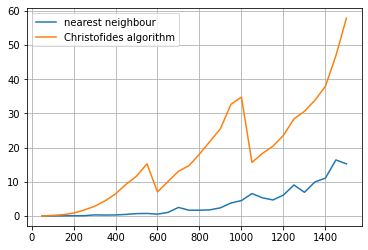

In [20]:
N = np.linspace(50, 1500, 30)
plt.plot(N, time_nearest, label="nearest neighbour")
plt.plot(N, time_christofides, label="Christofides algorithm")
plt.grid()
plt.legend()
plt.show()


